In [30]:
import pandas as pd
import glob
import json
import numpy as np

prisonerDilemmaFiles = [
    "/content/prisoner_dilemma_log_competitive.csv",
    "/content/prisoner_dilemma_log_competitive-else.csv",
    "/content/prisoner_dilemma_log_else.csv",
    "/content/prisoner_dilemma_log_self-interested.csv",
    "/content/prisoner_dilemma_log_self-interested-vs-competitive.csv",
    "/content/prisoner_dilemma_log_self-interested-vs-else.csv"
]

gameTypeAnalysis = {}

for filePath in prisonerDilemmaFiles:
    try:
        fileName = filePath.split('/')[-1]
        gameType = fileName.replace('prisoner_dilemma_log_', '').replace('.csv', '')

        if gameType == 'competitive':
            gameType = 'Competitive vs Competitive'
        elif gameType == 'else':
             gameType = 'Else vs Else'
        elif gameType == 'self-interested':
             gameType = 'Self-interested vs Self-interested'
        elif gameType == 'self-interested-vs-else':
            gameType = 'Self-interested vs Else'
        elif gameType == 'competitive-else':
            gameType = 'Competitive vs Else'
        elif gameType == 'self-interested-vs-competitive':
            gameType = 'Self-interested vs Competitive'

        df = pd.read_csv(filePath, engine='python', on_bad_lines='skip')
        df = df[df['Player0_Decision'].isin(['cooperate', 'defect'])]
        df = df[df['Player1_Decision'].isin(['cooperate', 'defect'])]

        for col in ['Player0_Score', 'Player1_Score', 'Player0_Total', 'Player1_Total']:
            df[col] = pd.to_numeric(df[col], errors='coerce')

        df.dropna(subset=['Player0_Total', 'Player1_Total'], inplace=True)

        if not df.empty:
            avgPlayer0Total = df['Player0_Total'].mean()
            avgPlayer1Total = df['Player1_Total'].mean()

            p0CooperateCount = (df['Player0_Decision'] == 'cooperate').sum()
            p0DefectCount = (df['Player0_Decision'] == 'defect').sum()
            p1CooperateCount = (df['Player1_Decision'] == 'cooperate').sum()
            p1DefectCount = (df['Player1_Decision'] == 'defect').sum()

            p0TotalDecisions = p0CooperateCount + p0DefectCount
            p1TotalDecisions = p1CooperateCount + p1DefectCount

            p0CooperatePct = (p0CooperateCount / p0TotalDecisions) * 100 if p0TotalDecisions > 0 else 0
            p0DefectPct = (p0DefectCount / p0TotalDecisions) * 100 if p0TotalDecisions > 0 else 0
            p1CooperatePct = (p1CooperateCount / p1TotalDecisions) * 100 if p1TotalDecisions > 0 else 0
            p1DefectPct = (p1DefectCount / p1TotalDecisions) * 100 if p1TotalDecisions > 0 else 0

            gameTypeAnalysis[gameType] = {
                'Average_Player0_Total': avgPlayer0Total,
                'Average_Player1_Total': avgPlayer1Total,
                'Player0_Cooperate_Count': p0CooperateCount,
                'Player0_Defect_Count': p0DefectCount,
                'Player1_Cooperate_Count': p1CooperateCount,
                'Player1_Defect_Count': p1DefectCount,
                'Player0_Cooperate_Percentage': p0CooperatePct,
                'Player0_Defection_Percentage': p0DefectPct,
                'Player1_Cooperation_Percentage': p1CooperatePct,
                'Player1_Defection_Percentage': p1DefectPct
            }

    except Exception as e:
        print(f"Error processing file {filePath}: {e}")

gameTypeAnalysisSerializable = {}
for gameType, metrics in gameTypeAnalysis.items():
    serializableMetrics = {}
    for key, value in metrics.items():
        if isinstance(value, (np.int64, np.float64)):
            serializableMetrics[key] = value.item()
        else:
            serializableMetrics[key] = value
    gameTypeAnalysisSerializable[gameType] = serializableMetrics

gameTypeAnalysisDf = pd.DataFrame.from_dict(gameTypeAnalysisSerializable, orient='index')

In [31]:
import numpy as np
import json

gameTypeAnalysisSerializable = {}
for gameType, metrics in gameTypeAnalysis.items():
    serializableMetrics = {}
    for key, value in metrics.items():
        if isinstance(value, (np.int64, np.float64)):
            serializableMetrics[key] = value.item()
        else:
            serializableMetrics[key] = value
    gameTypeAnalysisSerializable[gameType] = serializableMetrics

print(json.dumps(gameTypeAnalysisSerializable, indent=4))

{
    "Competitive vs Competitive": {
        "Average_Player0_Total": 36.15714285714286,
        "Average_Player1_Total": 35.69285714285714,
        "Player0_Cooperate_Count": 9,
        "Player0_Defect_Count": 131,
        "Player1_Cooperate_Count": 8,
        "Player1_Defect_Count": 132,
        "Player0_Cooperate_Percentage": 6.428571428571428,
        "Player0_Defection_Percentage": 93.57142857142857,
        "Player1_Cooperation_Percentage": 5.714285714285714,
        "Player1_Defection_Percentage": 94.28571428571428
    },
    "Competitive vs Else": {
        "Average_Player0_Total": 70.24,
        "Average_Player1_Total": 74.34,
        "Player0_Cooperate_Count": 8,
        "Player0_Defect_Count": 42,
        "Player1_Cooperate_Count": 9,
        "Player1_Defect_Count": 41,
        "Player0_Cooperate_Percentage": 16.0,
        "Player0_Defection_Percentage": 84.0,
        "Player1_Cooperation_Percentage": 18.0,
        "Player1_Defection_Percentage": 82.0
    },
    "Else vs El

In [32]:
import pandas as pd

gameTypeAnalysisDf = pd.DataFrame.from_dict(gameTypeAnalysisSerializable, orient='index')
display(gameTypeAnalysisDf)

,Average_Player0_Total,Average_Player1_Total,Player0_Cooperate_Count,Player0_Defect_Count,Player1_Cooperate_Count,Player1_Defect_Count,Player0_Cooperate_Percentage,Player0_Defection_Percentage,Player1_Cooperation_Percentage,Player1_Defection_Percentage
Competitive vs Competitive,36.157143,35.692857,9,131,8,132,6.428571,93.571429,5.714286,94.285714
Competitive vs Else,70.240000,74.340000,8,42,9,41,16.000000,84.000000,18.000000,82.000000
Else vs Else,25.500000,25.500000,50,0,50,0,100.000000,0.000000,100.000000,0.000000
Self-interested vs Self-interested,76.500000,76.500000,0,50,0,50,0.000000,100.000000,0.000000,100.000000
Self-interested vs Competitive,65.700000,83.700000,0,50,6,44,0.000000,100.000000,12.000000,88.000000
Self-interested vs Else,67.640000,80.840000,1,49,4,46,2.000000,98.000000,8.000000,92.000000


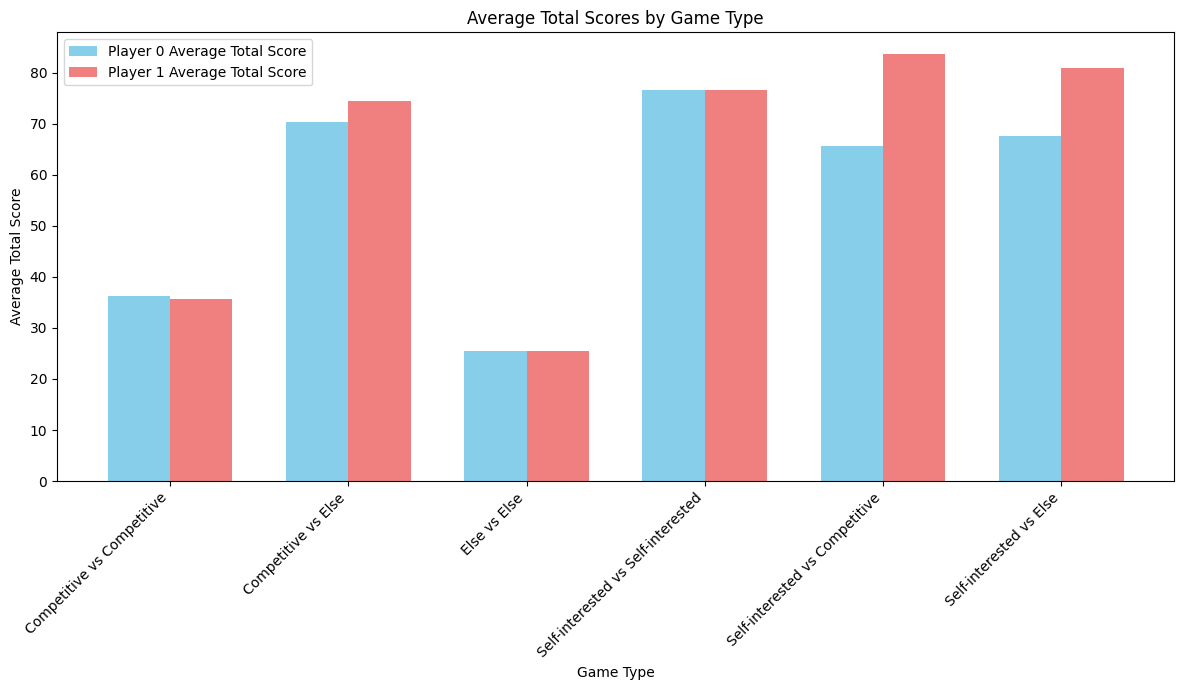

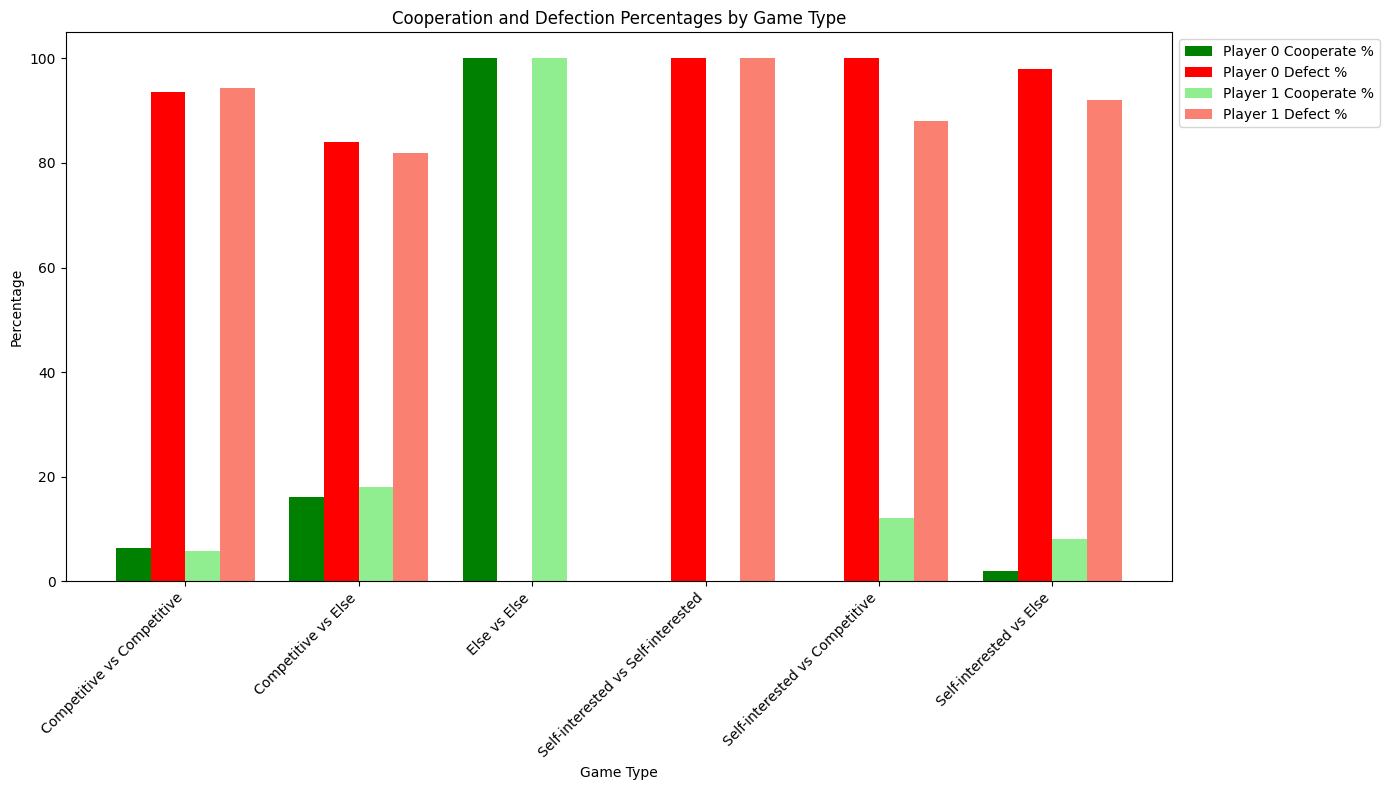

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

fig1, ax1 = plt.subplots(figsize=(12, 7))

gameTypes = gameTypeAnalysisDf.index
barWidth = 0.35
index = range(len(gameTypes))

bar1 = ax1.bar(index, gameTypeAnalysisDf['Average_Player0_Total'], barWidth, label='Player 0 Average Total Score', color='skyblue')
bar2 = ax1.bar([i + barWidth for i in index], gameTypeAnalysisDf['Average_Player1_Total'], barWidth, label='Player 1 Average Total Score', color='lightcoral')

ax1.set_xlabel('Game Type')
ax1.set_ylabel('Average Total Score')
ax1.set_title('Average Total Scores by Game Type')
ax1.set_xticks([i + barWidth / 2 for i in index])
ax1.set_xticklabels(gameTypes)
ax1.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

fig2, ax2 = plt.subplots(figsize=(14, 8))

barWidthPercent = 0.2
indexPercent = range(len(gameTypes))

barP0Cooperate = ax2.bar(indexPercent, gameTypeAnalysisDf['Player0_Cooperate_Percentage'], barWidthPercent, label='Player 0 Cooperate %', color='green')
barP0Defect = ax2.bar([i + barWidthPercent for i in indexPercent], gameTypeAnalysisDf['Player0_Defection_Percentage'], barWidthPercent, label='Player 0 Defect %', color='red')
barP1Cooperate = ax2.bar([i + 2 * barWidthPercent for i in indexPercent], gameTypeAnalysisDf['Player1_Cooperation_Percentage'], barWidthPercent, label='Player 1 Cooperate %', color='lightgreen')
barP1Defect = ax2.bar([i + 3 * barWidthPercent for i in indexPercent], gameTypeAnalysisDf['Player1_Defection_Percentage'], barWidthPercent, label='Player 1 Defect %', color='salmon')

ax2.set_xlabel('Game Type')
ax2.set_ylabel('Percentage')
ax2.set_title('Cooperation and Defection Percentages by Game Type')
ax2.set_xticks([i + 1.5 * barWidthPercent for i in indexPercent])
ax2.set_xticklabels(gameTypes)
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [34]:
for gameType, row in gameTypeAnalysisDf.iterrows():
    avgP0Total = row['Average_Player0_Total']
    avgP1Total = row['Average_Player1_Total']
    p0CoopPct = row['Player0_Cooperate_Percentage']
    p0DefectPct = row['Player0_Defection_Percentage']
    p1CoopPct = row['Player1_Cooperation_Percentage']
    p1DefectPct = row['Player1_Defection_Percentage']

    print(f"Game Type: {gameType}")
    print(f"- Average Total Scores: Player 0 = {avgP0Total:.2f}, Player 1 = {avgP1Total:.2f}")
    print(f"- Player 0: Cooperation = {p0CoopPct:.2f}%, Defection = {p0DefectPct:.2f}%")
    print(f"- Player 1: Cooperation = {p1CoopPct:.2f}%, Defection = {p1DefectPct:.2f}%")


Game Type: Competitive vs Competitive
- Average Total Scores: Player 0 = 36.16, Player 1 = 35.69
- Player 0: Cooperation = 6.43%, Defection = 93.57%
- Player 1: Cooperation = 5.71%, Defection = 94.29%
Game Type: Competitive vs Else
- Average Total Scores: Player 0 = 70.24, Player 1 = 74.34
- Player 0: Cooperation = 16.00%, Defection = 84.00%
- Player 1: Cooperation = 18.00%, Defection = 82.00%
Game Type: Else vs Else
- Average Total Scores: Player 0 = 25.50, Player 1 = 25.50
- Player 0: Cooperation = 100.00%, Defection = 0.00%
- Player 1: Cooperation = 100.00%, Defection = 0.00%
Game Type: Self-interested vs Self-interested
- Average Total Scores: Player 0 = 76.50, Player 1 = 76.50
- Player 0: Cooperation = 0.00%, Defection = 100.00%
- Player 1: Cooperation = 0.00%, Defection = 100.00%
Game Type: Self-interested vs Competitive
- Average Total Scores: Player 0 = 65.70, Player 1 = 83.70
- Player 0: Cooperation = 0.00%, Defection = 100.00%
- Player 1: Cooperation = 12.00%, Defection = 88.